### CREPE PITCH ESTIMATION PLOTTING


In [15]:
def plot_pitch_estimation(y, sr, time, f0, freq_focus, freq_range=0.1):
    """
    Plot spectrogram with F0 overlay
    
    Parameters:
    y : audio signal
    sr : sample rate
    time : time points from CREPE
    f0 : frequency values from CREPE
    freq_focus : center frequency for y-axis range
    freq_range : range around freq_focus (as proportion)
    """
    y_min = freq_focus * (1 - freq_range)
    y_max = freq_focus * (1 + freq_range)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 4))
    
    # Calculate and display spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(
        D, 
        y_axis='hz', 
        x_axis='time',
        sr=sr,
        ax=ax,
        vmin=-80,
        vmax=0,
        cmap='viridis'
    )
    
    # Plot F0 line
    ax.plot(time, f0, color='r', linewidth=1, alpha=1.0, label='f0')
    
    # Set y-axis limits and grid
    ax.set_ylim(y_min, y_max)
    tick_spacing = freq_focus * 0.05
    yticks = np.arange(y_min, y_max, tick_spacing)
    ax.set_yticks(yticks)
    ax.grid(True, alpha=0.3)
    
    # Add colorbar
    fig.colorbar(img, format='%+2.0f dB', pad=0.01)
    plt.tight_layout()
    return fig, ax

In [76]:
from pedalboard import Pedalboard, load_plugin
from pedalboard.io import AudioFile
from mido import Message 
import soundfile as sf
import numpy as np
import librosa
from IPython.display import Audio
import crepe
import matplotlib.pyplot as plt
from pathlib import Path
from audioUtilityFunctions import trim, apply_hann_window_fades
import pytsmod as tsm
import crepe  
import psola
import pandas as pd
import os
import scipy


sr = 22050

# Load a VST3 or Audio Unit plugin from a known path on disk:
autotune = load_plugin("/Library/Audio/Plug-Ins/VST3/Auto-Tune Pro.vst3")

print(autotune.parameters.keys())

autotune.retune_speed_ms = 0
autotune.input_type = 'Bass Inst.'

pitch = librosa.note_to_hz('D1')

y, sr = librosa.load('samples/singlenotes/york/sm57/york_003_D1_sm57.wav', sr=sr)
tuned = autotune(y, sr)


display(Audio(y, rate=sr))

display(Audio(tuned, rate=sr))





WRITING STATE INFORMATION TO CHUNK
Adding chunk data for version 10.0.0
Encrypting chunk data bytes: 1185
Encryption successful: writing to ParamsData attribute
WRITING STATE INFORMATION TO CHUNK
Adding chunk data for version 10.0.0
Encrypting chunk data bytes: 1185
Encryption successful: writing to ParamsData attribute


dict_keys(['correction_mode', 'scale', 'key', 'detune', 'retune_speed_ms', 'vibrato_shape', 'vibrato_pitch', 'vibrato_rate', 're_track_ara', 'tracking', 'input_type', 'use_classic_mode_dsp', 'n_a', 'graph_tool', 'tie_waveform_to_graph', 'track_pitch', 'object_retune_speed_ms', 'advanced_view', 'l_r_ref', 'learn_scale_from_midi', 'target_notes_via_midi', 'ignore_vibrato', 'show_waveform', 'v_onset_delay_ms', 'vibrato_amplitude', 'vibrato_formant', 'vibrato_variation', 'v_onset_rate_ms', 'object_adjust_vibrato', 'hold_note_shown', 'keyboard_edits', 'keyboard_mode', 'midi_octaves', 'humanize', 'natural_vibrato', 'snap_to_note', 'clock_source', 'auto_scroll', 'show_info_bar', 'formant_correction', 'throat_length', 'show_lanes', 'number_of_notes', 'transpose', 'object_throat_length', 'show_midi', 'time_display', 'enable_time_control', 'track_pitch_time', 'master_bypass', 'flex_tune', 'latency_removal', 'wet_dry_mix'])


WRITING STATE INFORMATION TO CHUNK
Adding chunk data for version 10.0.0
Encrypting chunk data bytes: 1171
Encryption successful: writing to ParamsData attribute
WRITING STATE INFORMATION TO CHUNK
Adding chunk data for version 10.0.0
Encrypting chunk data bytes: 1185
Encryption successful: writing to ParamsData attribute


In [53]:
f0_estimation_hop_length = 35


# crepe pitch estimation of original
time, estimated_f0, confidence, _ = crepe.predict(y, sr, viterbi=True, model_capacity='full', 
                              step_size=f0_estimation_hop_length)


# crepe pitch estimation of original
time, estimated_tuned_f0, confidence, _ = crepe.predict(tuned, sr, viterbi=True, model_capacity='full', 
                              step_size=f0_estimation_hop_length)





2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


(<Figure size 1200x400 with 2 Axes>, <Axes: xlabel='Time', ylabel='Hz'>)

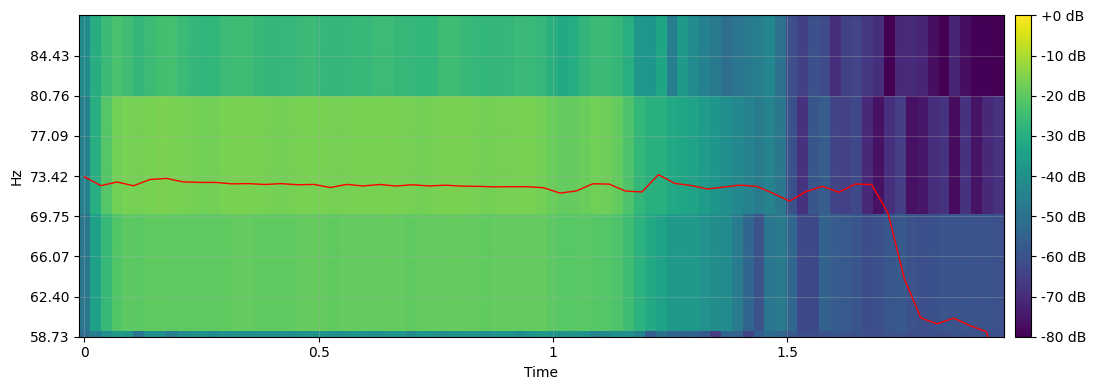

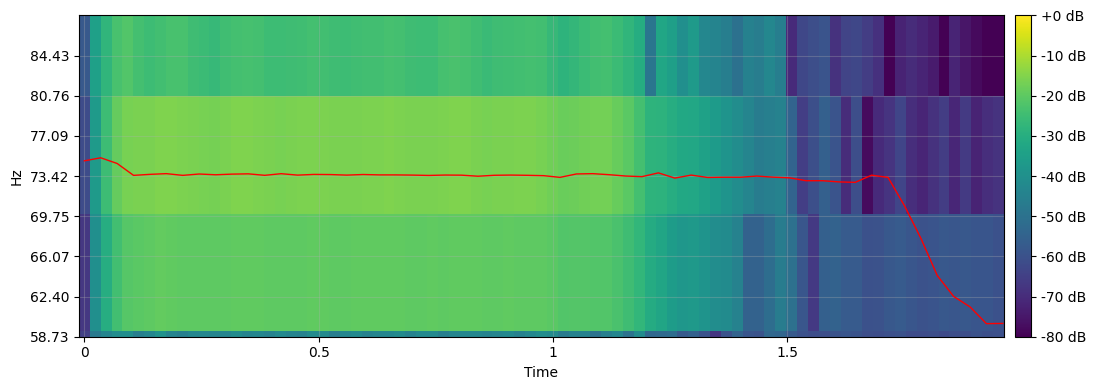

In [56]:
plot_pitch_estimation(y, sr, time, estimated_f0, freq_focus=pitch, freq_range=0.2)
plot_pitch_estimation(tuned, sr, time, estimated_tuned_f0, freq_focus=pitch, freq_range=0.2)